# Part 1: Prepare the Data

In [1]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# Read myopia csv into Dataframe
myopia_df = pd.read_csv('./Resources/myopia.csv')
myopia_df.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Drop myopic column
myopia_data = myopia_df.drop(columns=['MYOPIC'])
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_data)

# Part 2: Apply Dimensionality Reduction

In [5]:
# Perform dimensionality reduction with PCA.
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

### Perform dimensionality reduction with PCA. How did the number of the features change?
##### The change in features decreased from 14 to 10 with 618 samples.

In [6]:
# Taking the variance to detect impotance of components
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [7]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
tsne = TSNE(learning_rate=50)
transformed_features = tsne.fit_transform(pca_transformed_data)

In [8]:
# Checking if there are 2 dimensions
transformed_features.shape

(618, 2)

In [9]:
myopia_data["X"] = transformed_features[:,0]
myopia_data["y"] = transformed_features[:,1]
myopia_data["Myopic"] = myopia_df["MYOPIC"]
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,X,y,Myopic
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,-12.398184,15.113067,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-11.753460,-16.335182,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,14.094870,7.688968,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,5.738885,-20.439861,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,-1.585248,2.214705,0


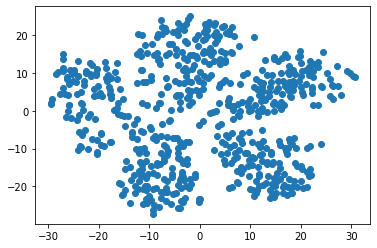

In [10]:
plt.scatter(myopia_data["X"], myopia_data["y"])
plt.show()

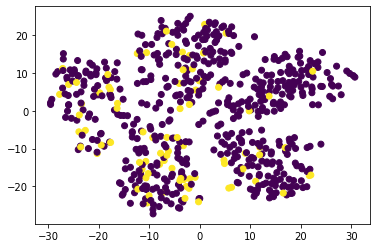

In [11]:
plt.scatter(myopia_data["X"], myopia_data["y"], c=myopia_data["Myopic"])
plt.show()

In [12]:
labels = myopia_data["Myopic"]
labels.value_counts()

0    537
1     81
Name: Myopic, dtype: int64

# Part 3: Perform a Cluster Analysis with K-means

In [13]:
myopia_pca_df = pd.DataFrame(data=pca_transformed_data, columns=["principal component 1", "principal component 2",
                                                                "principal component 3","principal component 4",
                                                                 "principal component 5","principal component 6",
                                                                 "principal component 7",
                                                                 "principal component 8","principal component 9",
                                                                 "principal component 10"])
myopia_pca_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


C:\Users\lshrn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


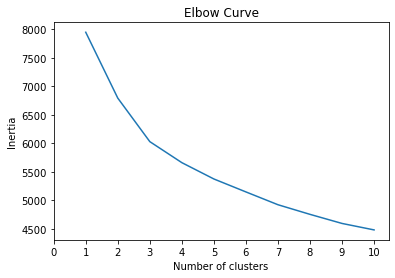

In [15]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
elbow_df.head()


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


In [17]:
def get_clusters(k, myopia_pca_df):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(myopia_pca_df)

    # Predict clusters
    predictions = model.predict(myopia_pca_df)

    # Create return DataFrame with predicted clusters
    myopia_pca_df["myopic"] = model.labels_

    return myopia_pca_df

In [18]:
clusters = get_clusters(2, myopia_pca_df)
clusters.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,myopic
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


In [19]:
def show_clusters(myopia_pca_df):
    plt.scatter(myopia_pca_df['principal component 1'], myopia_pca_df['principal component 2'], 
                c=myopia_pca_df['myopic'])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

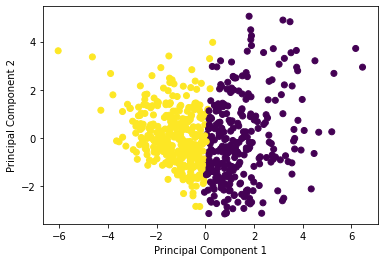

In [20]:
show_clusters(clusters)


# Part 4: Make a Recommendation

#### Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?


#### We started off with 618 samples and 14 variables which was reduced to 618 samples with 2 components after scaling the data. It is difficult to determine if the patients can be clustered into whether or not they are myopic. Therefore we can say that the data is inconclusive and that there are no clusters. 